<a href="https://colab.research.google.com/github/Sanky2151/Retail-sales-prediction-ML/blob/main/Retail_sales_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -** Sanket Nimbalkar


# **Project Summary -**

This Supervised Machine Learning project. In this project i will have to build model that is capable of predicting the sales of Rossmann stores.
This data set contains certain details of 1115 stores operating and non operating.

In this project we have been provided with 2 CSV datasets for analysis purpose we wil merge the dataset on the basis of "Store" column.

After merging we found 1017209 rows, 18 column.There was null values in certain columns like promo2sinceyear :-508031.After understanding the data set we applied data wranglling and feature engineering.

After the treatment of dataset we perform Univariate analysis, Bivariante and multivariante analysis to understand the dataset.

To build our model first we split the data set into 75:25 where 25 is test dataset.After the splliting we transform them and perform normalization.

First we applied Linear regression then Ridge regression, Elastic Net, Decision tree, Random forest, Gradient boost and XGboost  over the data set but we got maximum accuracy on the application of Random Forest.

# **GitHub Link -**

https://github.com/Sanky2151

# **Problem Statement**



we have historical sales data for 1115 rossmann store and task is to forecast Sales and note that some store in dataset were temporary closed for refurbishment

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import datetime
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import matplotlib.pylab as pylab

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg

#Performance metrics
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, accuracy_score

#Tools for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import math

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = ('/content/drive/MyDrive/Colab Notebooks/')
#file 1
rossmann_store = pd.read_csv( file_path + 'Rossmann Stores Data.csv')
# file 2
store = pd.read_csv(file_path + 'store.csv')

### Dataset First View

In [4]:
rossmann_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
# Merging both files
main_df = pd.merge(left=rossmann_store, right=store, how='left', on = ['Store'] )

In [7]:
# Dataset First Look
main_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
main_df.shape

(1017209, 18)

### Dataset Information

In [9]:
# Dataset Info
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
main_df.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
main_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

<Axes: >

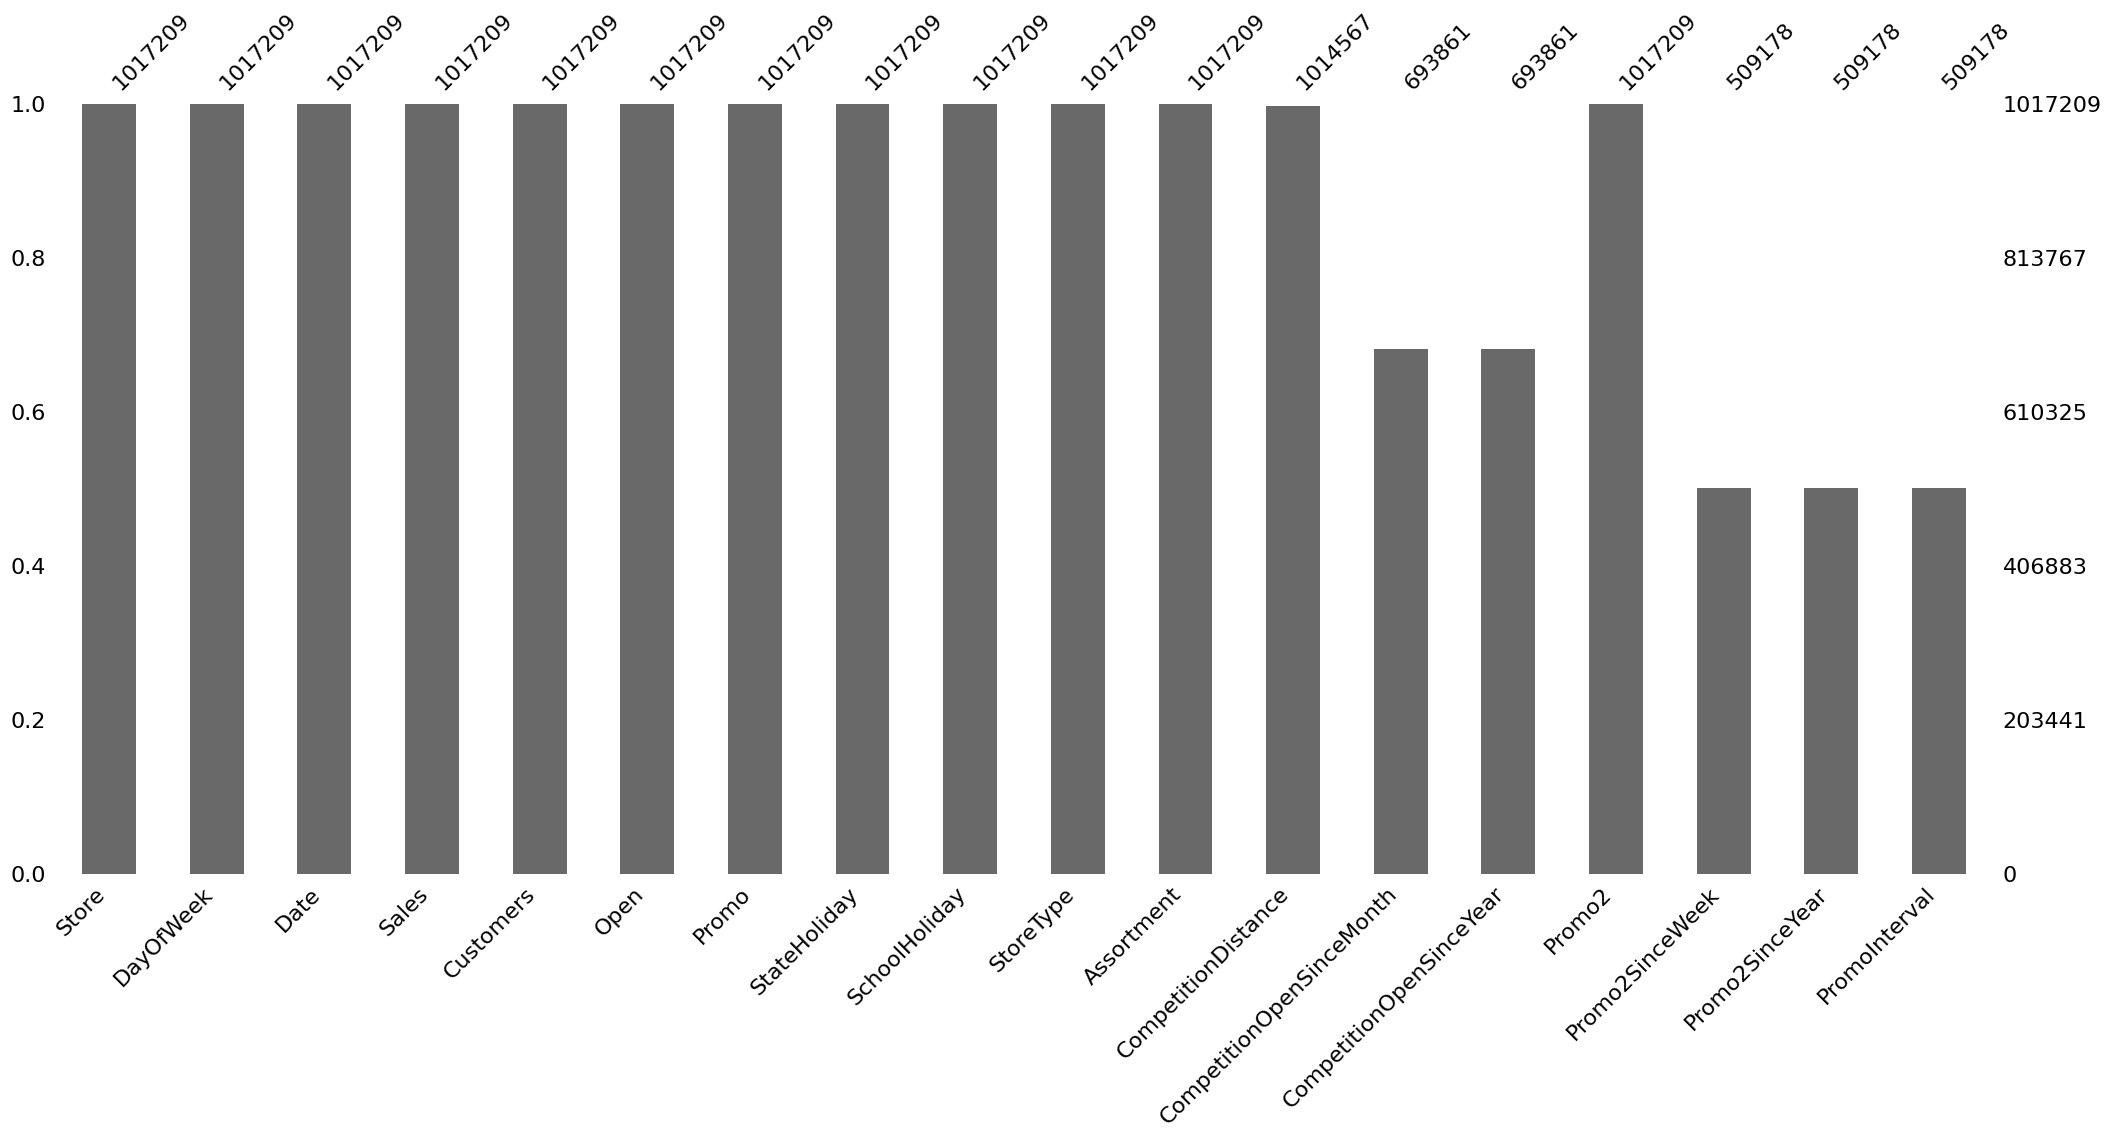

In [12]:
# Visualizing the missing values
msno.bar(main_df)

### What did you know about your dataset?

* There are lots of missing data in some feature
 * CompetitionDistance null values are : 2642
 * CompetitionOpenSinceMonth null values are : 323348
 * CompetitionOpenSinceYear null values are : 323348
 * Promo2SinceWeek null values are : 508031
 * Promo2SinceYear null values are : 508031
 * PromoInterval null values are : 508031
 * Shape of merge data set (1017209, 18)

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
main_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [14]:
# Dataset Describe
main_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


### Variables Description

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for i in main_df.columns:
  print('Number of unique values in {} column are {} \n The unique values are {}'.format(i,len(main_df[i].unique()), main_df[i].unique()))
  print('-------------------------------------------------')

Number of unique values in Store column are 1115 
 The unique values are [   1    2    3 ... 1113 1114 1115]
-------------------------------------------------
Number of unique values in DayOfWeek column are 7 
 The unique values are [5 4 3 2 1 7 6]
-------------------------------------------------
Number of unique values in Date column are 942 
 The unique values are ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
# creating function to extract year, month, day and week of year from "Date"
def convert_date(df):
    df['Date']=pd.to_datetime(df['Date'])
    df['Year']=df.Date.dt.year
    df['Month']=df.Date.dt.month
    df['Day']=df.Date.dt.day
    df['WeekOfYear']=df.Date.dt.isocalendar().week

In [17]:
# Extracting year, month, day and week of year from "Date"
convert_date(main_df)

In [18]:
#store open value count
main_df['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [19]:
main_df['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64

In [20]:

# Function to get top ten sum
def top_10_sum(df,by_col,group_col):
  return df.groupby(by_col)[group_col].sum().sort_values(ascending= False).head(10)

In [21]:

# Assigning top ten stores with highest sales to a variable
top_10_stores_highest_sales = top_10_sum(main_df,'Store','Sales').reset_index(name='sum of Sales')
top_10_stores_highest_sales


,Store,sum of Sales
0,262,19516842
1,817,17057867
2,562,16927322
3,1114,16202585
4,251,14896870
5,513,14252406
6,788,14082141
7,733,14067158
8,383,13489879
9,756,12911782


In [22]:
# Assigning top ten stores with highest customers to a variable
top_10_stores_highest_cust = top_10_sum(main_df,'Store','Customers').reset_index(name='sum of Customers')
top_10_stores_highest_cust

,Store,sum of Customers
0,733,3206058
1,262,3204694
2,562,2924960
3,769,2902351
4,1114,2509542
5,817,2454370
6,1097,2280508
7,335,2246936
8,259,2210980
9,251,1908934


In [23]:
# Creating Average customer sales column
main_df['Avg_Customer_Sales'] = main_df.Sales/main_df.Customers

### What all manipulations have you done and insights you found?

We have extracted year, month, date and week of the year

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

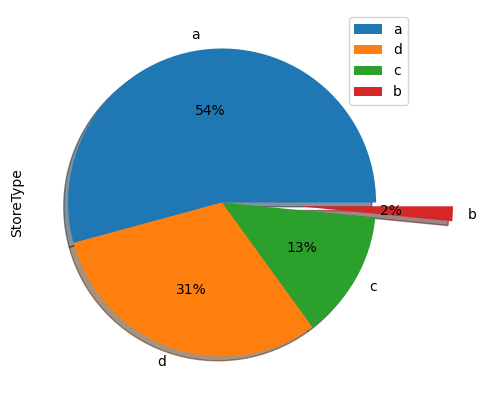

In [24]:
# Chart - 1 visualization code
# sns.countplot(data=main_df,x='StoreType')

store_type= main_df['StoreType'].value_counts()
store_type
plt.figure(figsize=(10, 5))
# # plt.subplot(1,2,1)
store_type.plot.pie(autopct= '%1.f%%', explode=[0, 0, 0, 0.5], shadow=True )
plt.legend()
plt.show()




##### 1. Why did you pick the specific chart?

Pie chart will show us exact distribution of storeType with percentage

##### 2. What is/are the insight(s) found from the chart?

We can clear see that StoreType A have highest stores followed by D and C.
StoreType B have least number of store

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Here we can see Store Count distribution where StoreType B has less no. of store and StoreType A has most no. store.**


#### Chart - 2

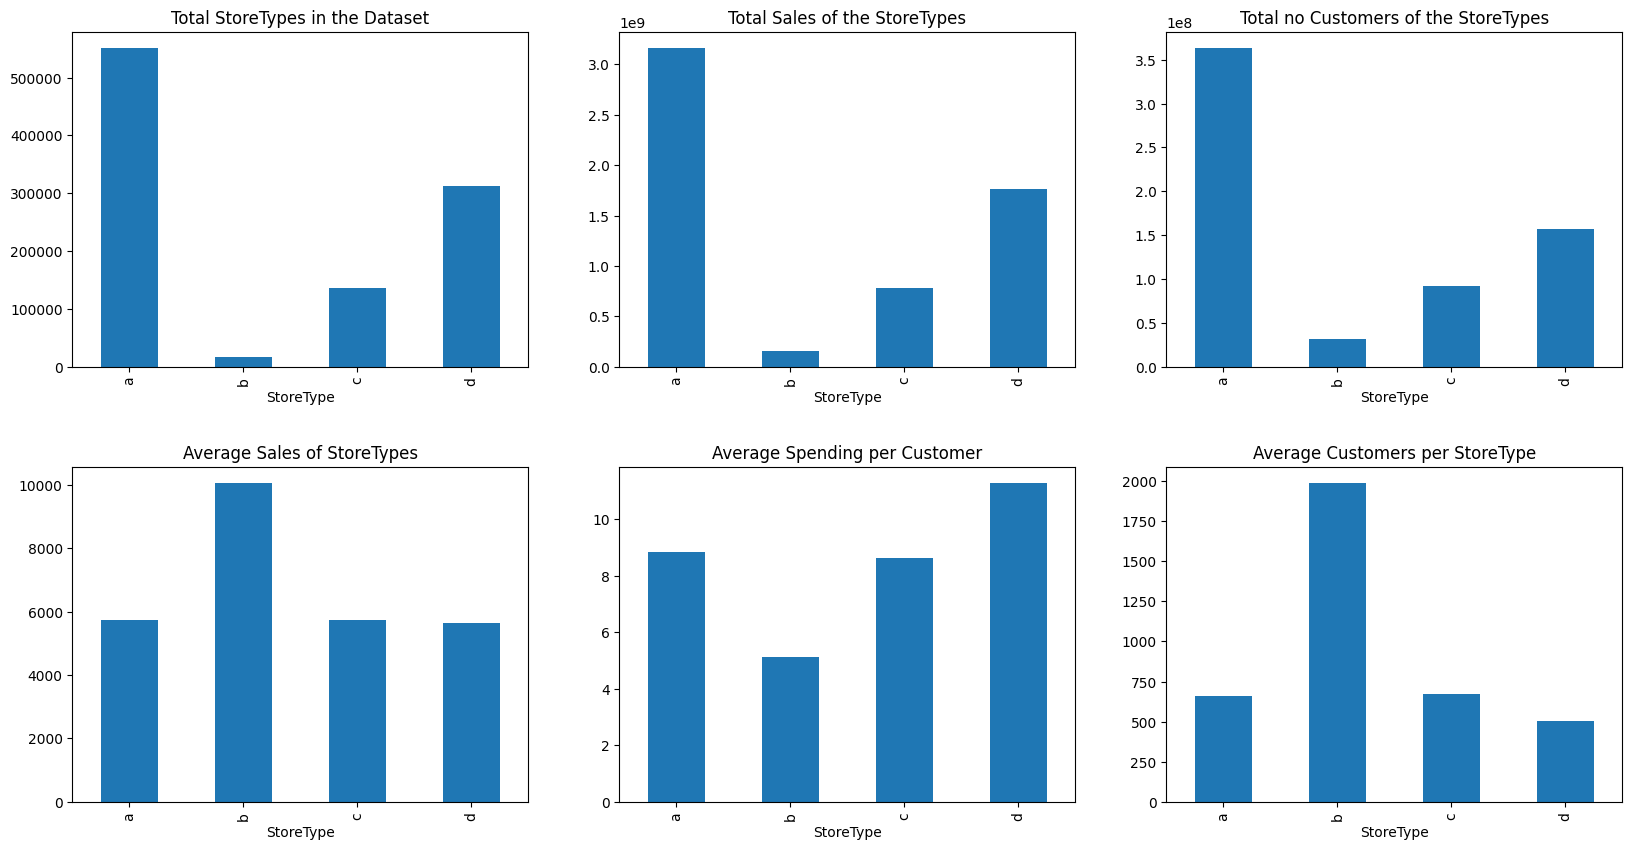

In [25]:
# Chart - 2 visualization code
f, ax = plt.subplots(2, 3, figsize = (20,10))

main_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
main_df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
main_df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total no Customers of the StoreTypes")
main_df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
main_df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
main_df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

##### 1. Why did you pick the specific chart?

bar chart will show exact distribution of various columns

##### 2. What is/are the insight(s) found from the chart?

In total no. of stores, customer and sales store A is leading and B have least.
In average sales per storeType and customer per storeType store B is leading.
In average spending of customer per storeType D have highest followed by A, C ,B.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**As we can see from Graphs, the StoreType A has most Store, Sales and Customers. Whereas StoreType D has highest average spending per customers and StoreType B with less store has highest average sales and average customers**

#### Chart - 3

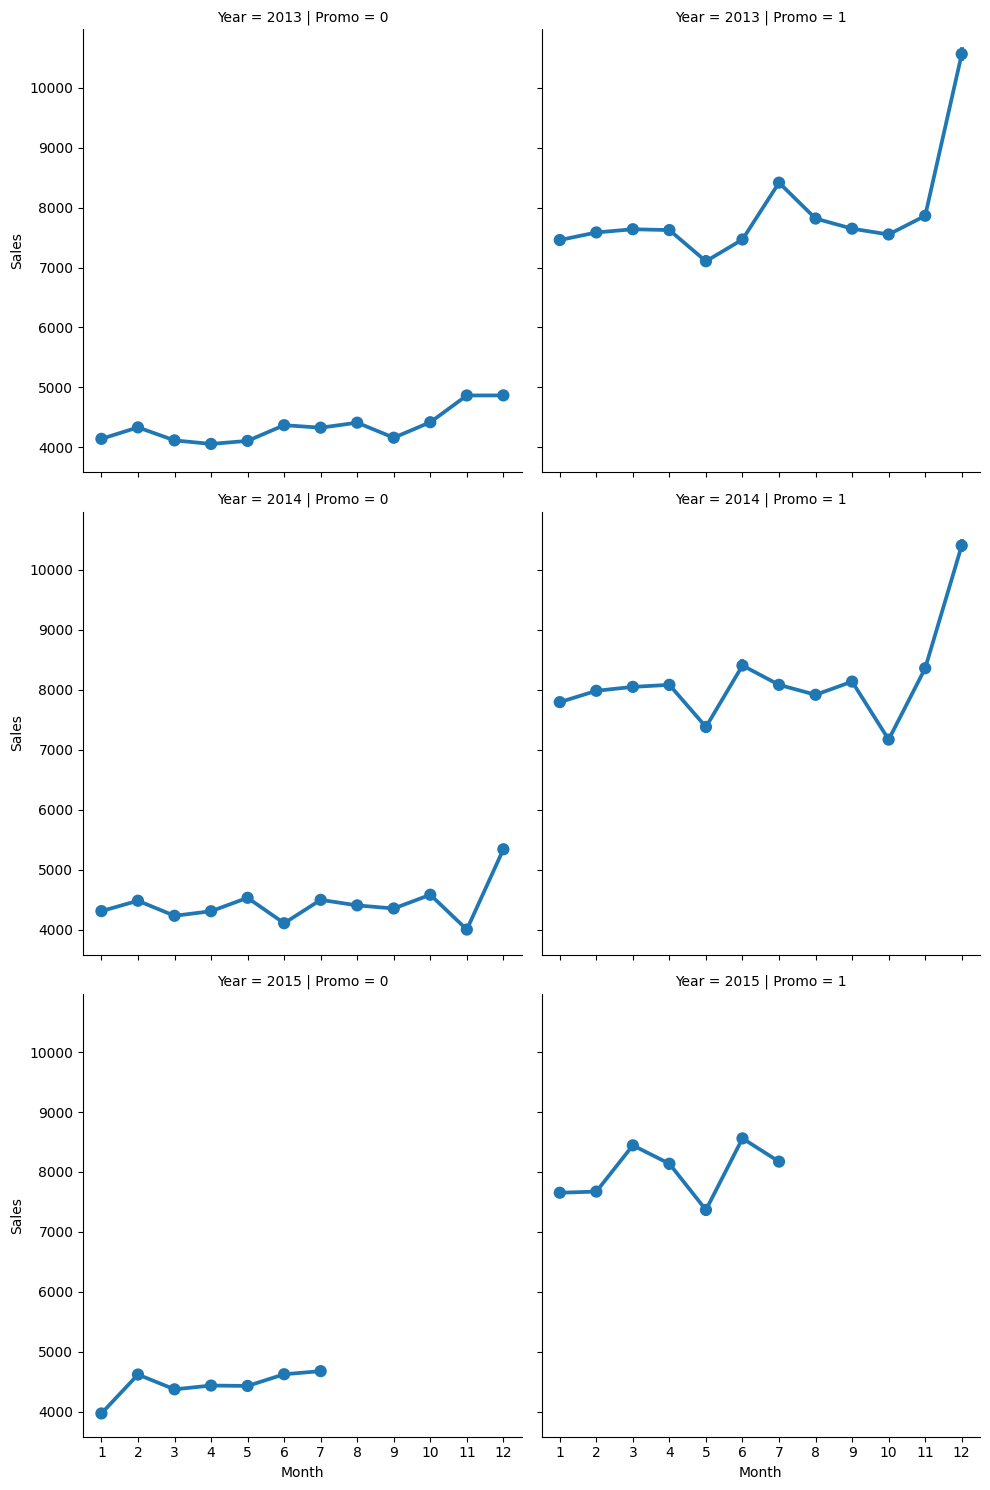

In [26]:
# Chart - 3 visualization code
sns.catplot(data = main_df, x ="Month", y = "Sales", col = 'Promo', row = "Year", kind='point')

##### 1. Why did you pick the specific chart?

To visualize sales with respect month and year

##### 2. What is/are the insight(s) found from the chart?

In every year end sales are increasing

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Here as we can see store having promotion the sales are higher.**

#### Chart - 4

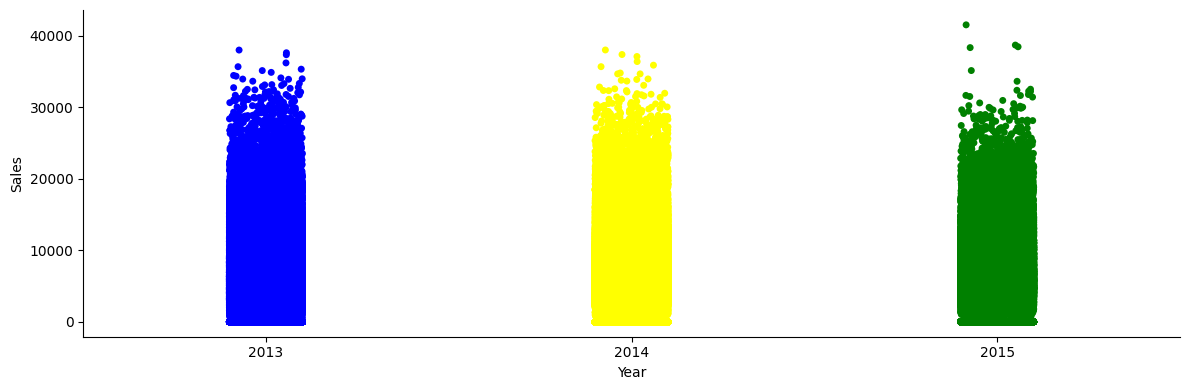

In [27]:
# Chart - 4 visualization code
#plotting year vs sales
sns.catplot(x='Year',y='Sales',data=main_df, height=4, aspect=3, palette=['Blue', 'Yellow', 'Green'] );

##### 1. Why did you pick the specific chart?

To see the year wise sales distribution

##### 2. What is/are the insight(s) found from the chart?

In every year sales is almost same

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Here we can see almost no difference in the three years in terms of sales**

#### Chart - 5

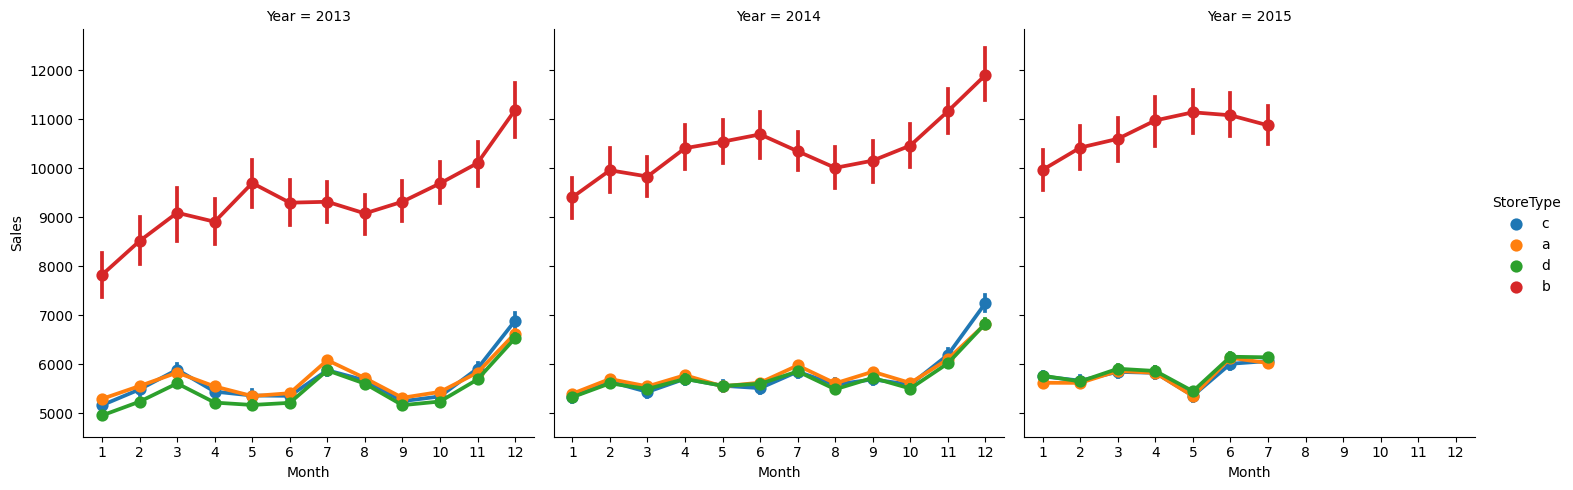

In [28]:
# Chart - 5 visualization code
# Sales vs month in every year
sns.catplot(data= main_df, x='Month', y='Sales', hue='StoreType', col='Year', kind='point')

##### 1. Why did you pick the specific chart?

Sales distribution of different Stores with respect to month in every year

##### 2. What is/are the insight(s) found from the chart?

Store B have highest Sales compare to other stores in every year

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

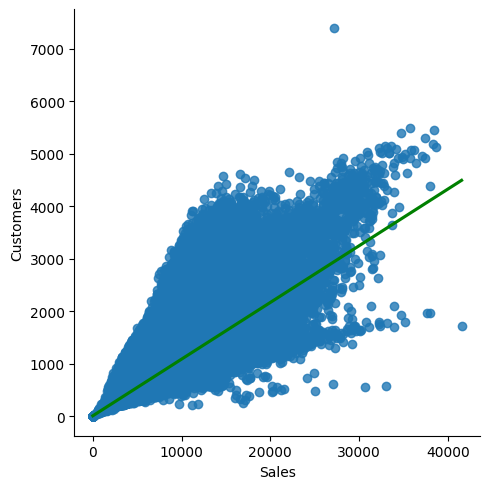

In [29]:
# # Chart - 6 visualization code
#regression plot
sns.lmplot(x= 'Sales' , y ='Customers',data=main_df, palette='seismic', height=5,aspect=1, line_kws={'color':'Green'});

##### 1. Why did you pick the specific chart?

To visualize linearity between customers and sales

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Here we can see customers and sales have high linear relations**

#### Chart - 7

In [30]:
main_df["Holiday"] = main_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [31]:
df1 = main_df.SchoolHoliday.value_counts()
df2 = main_df.Holiday.value_counts()

In [32]:
df1

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [33]:
# Chart - 7 visualization code
fig = plt.figure(figsize=(15,9), dpi=1600)

ax1 = plt.subplot2grid((1,2),(0,0))
labels = 'Not-Affected' , 'Affected'
explode = (0.1, 0.0)
plt.pie(df1,colors=("gold","silver"), autopct='%1.1f%%', labels = labels,  explode=explode )
plt.title('SchoolHoliday Effect')
#next one
ax1 = plt.subplot2grid((1, 2), (0, 1))
plt.pie(df2,colors=("gold","silver"),autopct='%1.1f%%', labels =labels,  explode=explode)
plt.title('StateHoliday Effect')

Text(0.5, 1.0, 'StateHoliday Effect')

##### 1. Why did you pick the specific chart?

To see the Holiday affected how many percentage of sales

##### 2. What is/are the insight(s) found from the chart?

School Holiday affected 17.9 %

State Holiday affected 3.1%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**As we can see in the Piechart Sales affected by School Holiday is 18% and by state holiday is 3% Mainly Sales aren't afffected by School Holiday**

#### Chart - 8

Text(0.5, 1.0, 'Distributin of Sales')

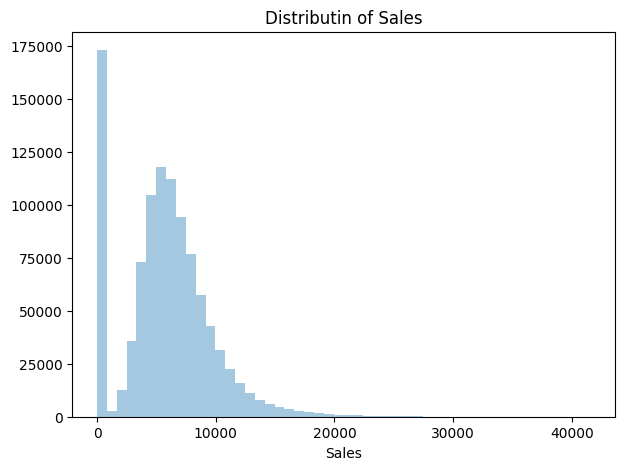

In [34]:
# Chart - 8 visualization code
fig = plt.figure(figsize=(7,5))
sns.distplot(main_df.Sales.dropna(), kde=False)
plt.title("Distributin of Sales")

##### 1. Why did you pick the specific chart?

To get distribution of sales

##### 2. What is/are the insight(s) found from the chart?

We can see sales distribution are positively skewed

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Here 0 is showing because lot of time stores were closed**

#### Chart - 9

<Axes: >

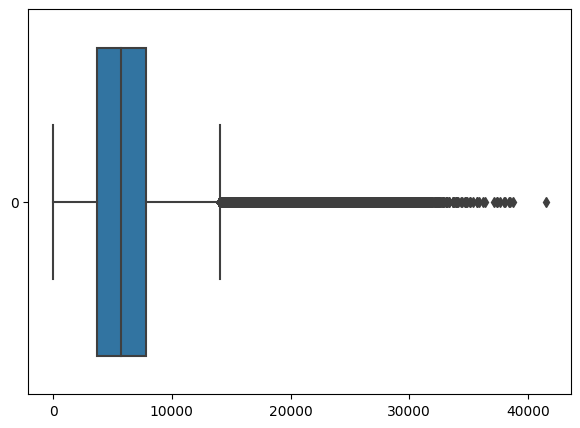

In [35]:
# Chart - 9 visualization code
#checking outliers in sales
from matplotlib import rcParams
rcParams['figure.figsize'] = 7,5
sns.boxplot(main_df['Sales'], orient='h')

##### 1. Why did you pick the specific chart?

To find outliers

##### 2. What is/are the insight(s) found from the chart?

There are some outliers

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Here we can see some outliers we need to remove it**

#### Chart - 10

<Axes: >

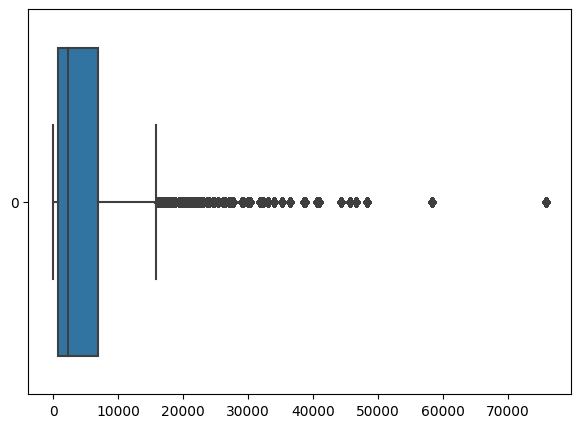

In [36]:
# Chart - 10 visualization code

sns.boxplot(main_df['CompetitionDistance'], orient='h')


##### 1. Why did you pick the specific chart?

To find outliers

##### 2. What is/are the insight(s) found from the chart?

There are some outliers

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Here We can see some outliers we need to remove it**

#### Chart - 11 - Correlation Heatmap

In [37]:
corr_df = main_df.drop(['Avg_Customer_Sales', 'Date', 'CompetitionOpenSinceMonth', 'Holiday', 'Promo2SinceWeek' ], axis=1)

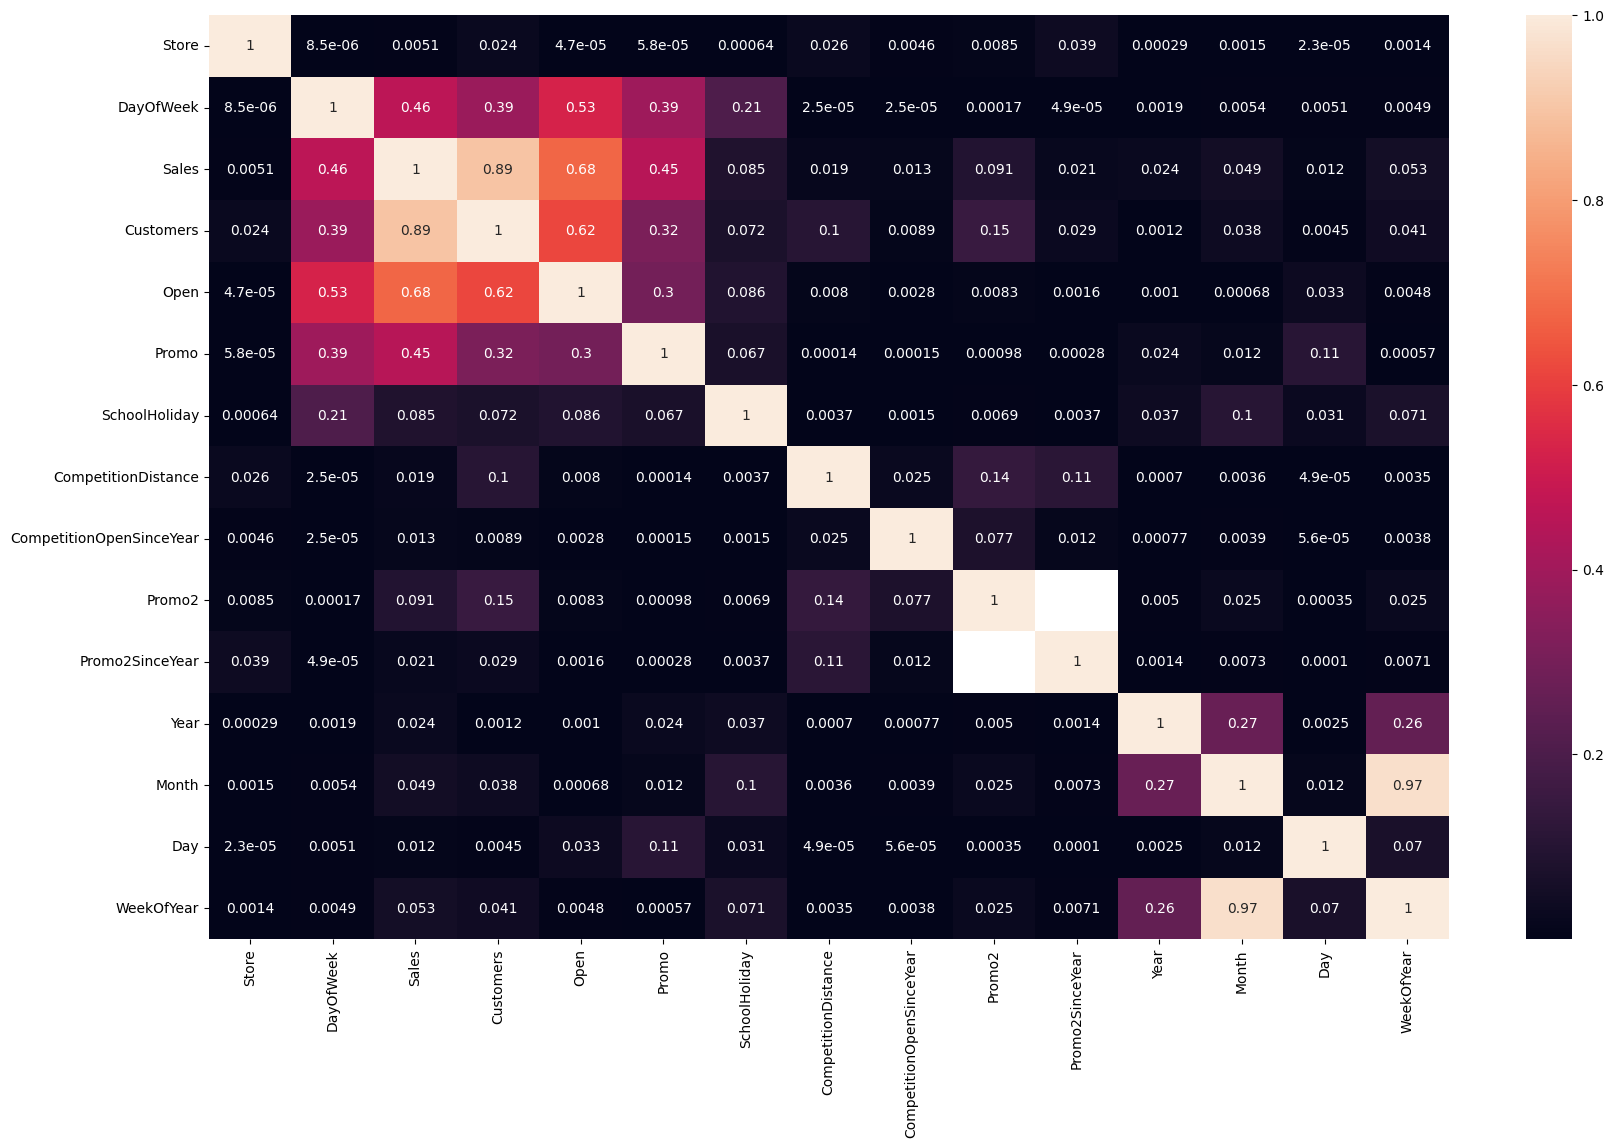

In [38]:
plt.subplots(figsize=(20,12))
sns.heatmap(corr_df.corr().abs(), annot=True)
plt.savefig("heatmap.png")


##### 1. Why did you pick the specific chart?

To see the correlation

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 12 - Pair Plot

In [39]:
main_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'Avg_Customer_Sales', 'Holiday'],
      dtype='object')

In [40]:
pair_df = main_df.drop(['Date', 'Open', 'Promo', 'CompetitionOpenSinceYear', 'Year' , 'Assortment', 'PromoInterval', 'Store','StateHoliday', 'CompetitionOpenSinceMonth', 'Promo2', 'Month', 'Day', 'Avg_Customer_Sales', 'Holiday', 'Promo2SinceWeek','Promo2SinceYear'],axis=1)

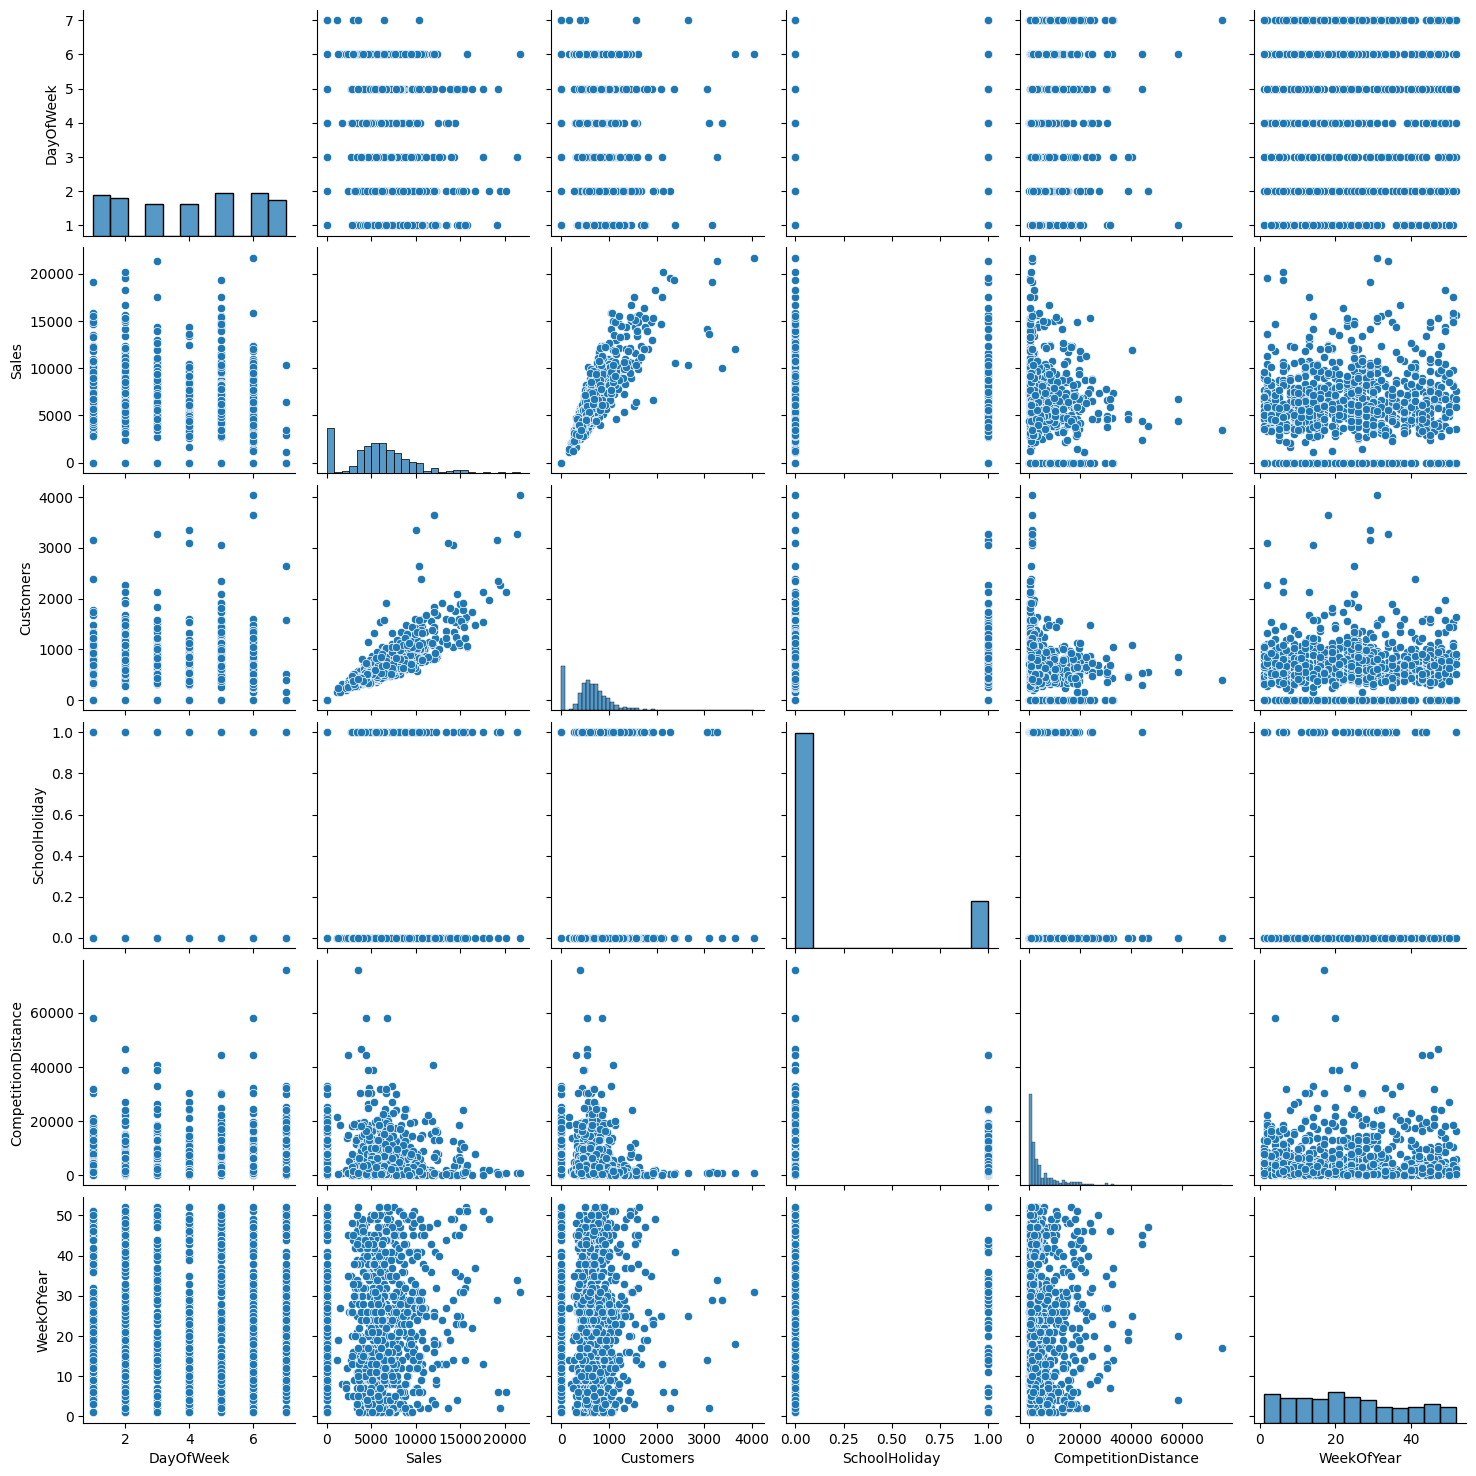

In [41]:
# Pair Plot visualization code
# pair_df = main_df.sample(n= 1000)
pa = pair_df.sample(n=1000)
sns.pairplot(pa)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* null hypothesis: “StoreType” and “Assortment” are independent to each other.

* alternative hypothesis: “StoreType” and “Assortment” are dependent to each other.

#### 2. Perform an appropriate statistical test.

In [42]:

# Perform Statistical Test to obtain P-Value

##Chi_square test
ed_contingency = pd.crosstab(main_df['StoreType'],
 main_df['Assortment'])

from scipy.stats.contingency import chi2_contingency
chi2_stat, pvalue, dof, exp = chi2_contingency(ed_contingency)
print('p-value is :-',pvalue,'less than 0.05')
print('We accept null hypothesis here')

p-value is :- 0.0 less than 0.05
We accept null hypothesis here


##### Which statistical test have you done to obtain P-Value?

Chi_square test used here to get p_value.

##### Why did you choose the specific statistical test?

Here is 2 categorical feature and we trying to find relation between them so we used Chi_square method to check realtion between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* null hypothesis: 'StateHoliday' and 'SchoolHoliday' sales are independent to each other.

* alternative hypothesis: 'StateHoliday' and 'SchoolHoliday' sales are
not independent to each other.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

import scipy.stats as stats

# Extract numerical variables for Group A
group_a_sales = main_df.loc[main_df['Holiday'] , 'Sales']

# Extract numerical variables for Group B
group_b_sales = main_df.loc[main_df['SchoolHoliday'] , 'Sales']

# Perform two-sample independent t-test
t_statistic, p_value = stats.ttest_ind(group_a_sales, group_b_sales)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
print('p-value is :-',p_value,'less than 0.05')
print('We accept null hypothesis here')

T-Statistic: -355.7684555969672
P-Value: 0.0
p-value is :- 0.0 less than 0.05
We accept null hypothesis here


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [44]:
# Handling Missing Values & Missing Value Imputation

main_df['CompetitionDistance']= main_df['CompetitionDistance'].fillna(0)

main_df['CompetitionOpenSinceMonth']= main_df['CompetitionOpenSinceMonth'].fillna(0)

competition_since_year=main_df['CompetitionOpenSinceYear'].mode().iloc[0]
main_df['CompetitionOpenSinceYear']= main_df['CompetitionOpenSinceYear'].fillna(competition_since_year)

main_df['Promo2SinceWeek']= main_df['Promo2SinceWeek'].fillna(0)

promo_since_year=main_df['Promo2SinceYear'].mode().iloc[0]
main_df['Promo2SinceYear']= main_df['Promo2SinceYear'].fillna(promo_since_year)

promoInter = main_df['PromoInterval'].mode().iloc[0]
main_df['PromoInterval']= main_df['PromoInterval'].fillna(promoInter)

In [45]:
# Dropping col
main_df=main_df.drop(['Avg_Customer_Sales'], axis=1)

In [46]:
# Checking null values
main_df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
Holiday                      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [47]:
# Handling Outliers & Outlier treatments
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low_value  = q1-1.5*iqr
    high_value = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > low_value) & (df_in[col_name] < high_value)]
    return df_out

In [48]:
main_df=remove_outlier(main_df, 'Sales')

In [49]:
main_df=remove_outlier(main_df, 'CompetitionDistance')

In [50]:
main_df.shape

(894117, 23)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Inter quantile Range

### 3. Categorical Encoding

In [51]:
# Encode your categorical columns
# Mapping Categorical variable to numerical
# Mapping StoreType variable
main_df['StoreType'] =main_df['StoreType'].map({'a':0, 'b': 1, 'c':2, 'd':3})
main_df['Assortment']= main_df['Assortment'].map({'a':0, 'b':1,'c':2})
main_df['PromoInterval']= main_df['PromoInterval'].map({'Jan,Apr,Jul,Oct':0, 'Feb,May,Aug,Nov':1,'Mar,Jun,Sept,Dec':2})
main_df['StateHoliday'] = main_df['StateHoliday'].replace({0: '0'})
# Converting categorical variable into dummy
main_df = pd.get_dummies(main_df, drop_first=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [52]:
# Expand Contraction

#### 2. Lower Casing

In [53]:
# Lower Casing

#### 3. Removing Punctuations

In [54]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [55]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [56]:
# Remove Stopwords

In [57]:
# Remove White spaces

#### 6. Rephrase Text

In [58]:
# Rephrase Text

#### 7. Tokenization

In [59]:
# Tokenization

#### 8. Text Normalization

In [60]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [61]:
# POS Taging

#### 10. Text Vectorization

In [62]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [63]:
# Manipulate Features to minimize feature correlation and create new features
def com_month(df):
    df['CompetitionOpen']=12*(df.Year - df['CompetitionOpenSinceYear'])
    +(df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen']=df['CompetitionOpen'].map(lambda x:0 if x<0 else x).fillna(0)


In [64]:
com_month(main_df)
main_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,...,PromoInterval,Year,Month,Day,WeekOfYear,Holiday,StateHoliday_a,StateHoliday_b,StateHoliday_c,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,1,2,0,...,0,2015,7,31,31,0,0,0,0,84.0
1,2,5,2015-07-31,6064,625,1,1,1,0,0,...,0,2015,7,31,31,0,0,0,0,96.0
2,3,5,2015-07-31,8314,821,1,1,1,0,0,...,0,2015,7,31,31,0,0,0,0,108.0
3,4,5,2015-07-31,13995,1498,1,1,1,2,2,...,0,2015,7,31,31,0,0,0,0,72.0
5,6,5,2015-07-31,5651,589,1,1,1,0,0,...,0,2015,7,31,31,0,0,0,0,24.0


In [65]:
def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']

In [66]:
promo_cols(main_df)
main_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,...,Year,Month,Day,WeekOfYear,Holiday,StateHoliday_a,StateHoliday_b,StateHoliday_c,CompetitionOpen,Promo2Open
0,1,5,2015-07-31,5263,555,1,1,1,2,0,...,2015,7,31,31,0,0,0,0,84.0,0.000000
1,2,5,2015-07-31,6064,625,1,1,1,0,0,...,2015,7,31,31,0,0,0,0,96.0,64.200000
2,3,5,2015-07-31,8314,821,1,1,1,0,0,...,2015,7,31,31,0,0,0,0,108.0,51.966667
3,4,5,2015-07-31,13995,1498,1,1,1,2,2,...,2015,7,31,31,0,0,0,0,72.0,0.000000
5,6,5,2015-07-31,5651,589,1,1,1,0,0,...,2015,7,31,31,0,0,0,0,24.0,0.000000


In [67]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894117 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      894117 non-null  int64         
 1   DayOfWeek                  894117 non-null  int64         
 2   Date                       894117 non-null  datetime64[ns]
 3   Sales                      894117 non-null  int64         
 4   Customers                  894117 non-null  int64         
 5   Open                       894117 non-null  int64         
 6   Promo                      894117 non-null  int64         
 7   SchoolHoliday              894117 non-null  int64         
 8   StoreType                  894117 non-null  int64         
 9   Assortment                 894117 non-null  int64         
 10  CompetitionDistance        894117 non-null  float64       
 11  CompetitionOpenSinceMonth  894117 non-null  float64

#### 2. Feature Selection

In [68]:
len(main_df[main_df['Open']!=0])

737258

In [69]:
main_df =main_df[main_df.Open !=0]
main_df = main_df.drop(['Open'],axis=1)

In [70]:
main_df.shape

(737258, 26)

In [71]:
len(main_df[main_df['Sales']!=0])

737205

In [72]:
main_df = main_df[main_df.Sales !=0]


In [73]:
main = main_df.copy()

In [74]:
# # Converting categorical variable into dummy
# main_dummies = pd.get_dummies(main, drop_first=True)

In [75]:
main.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Day', 'WeekOfYear', 'Holiday', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'CompetitionOpen', 'Promo2Open'],
      dtype='object')

In [76]:
main.shape

(737205, 26)

In [77]:
# # Dropping col
# main_df=main_df.drop(['Avg_Customer_Sales'], axis=1)

In [78]:
# Dropping some column
main = main.drop(['Store','Date','Holiday','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Day', 'Year', 'Promo2SinceWeek','Promo2SinceYear','Month',], axis=1)

In [79]:
# Creating dependent and independent variable
dep_var='Sales'
indep_var=main.columns.drop(dep_var)

In [80]:
# Creating X nd y variable
X = main[indep_var]
y = main[dep_var]

In [81]:

X.head()

,DayOfWeek,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,WeekOfYear,StateHoliday_a,StateHoliday_b,StateHoliday_c,CompetitionOpen,Promo2Open
0,5,555,1,1,2,0,1270.0,0,0,31,0,0,0,84.0,0.000000
1,5,625,1,1,0,0,570.0,1,0,31,0,0,0,96.0,64.200000
2,5,821,1,1,0,0,14130.0,1,0,31,0,0,0,108.0,51.966667
3,5,1498,1,1,2,2,620.0,0,0,31,0,0,0,72.0,0.000000
5,5,589,1,1,0,0,310.0,0,0,31,0,0,0,24.0,0.000000


In [82]:
y

0           5263
1           6064
2           8314
3          13995
5           5651
           ...  
1016776     3375
1016827    10765
1016863     5035
1017042     4491
1017190     5961
Name: Sales, Length: 737205, dtype: int64

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [83]:
# Transform Your data

### 6. Data Scaling

In [84]:
# # Scaling your data
# scaler=StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [85]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [86]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=69)

In [87]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((552903, 15), (184302, 15), (552903,), (184302,))

In [88]:
# Scaling your data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [89]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 = Linear Regression

In [90]:
# ML Model - 1 Implementation

# Fit the Algorithm
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [91]:
# Predict on the model
def rmse(x, y):
    return math.sqrt(mse(x, y))

train_score_1=regressor.score(X_train, y_train)
test_score_1=regressor.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_1 , "," ,
      "Out of Sample Test Score" ,":" , test_score_1)

y_predicted_1 = regressor.predict(X_train)
y_test_predicted_1 = regressor.predict(X_test)

rmse_t1=rmse(y_train, y_predicted_1)
rmse1 =rmse(y_test, y_test_predicted_1)
print("Training RMSE", ":",rmse_t1 ,
      "Testing RMSE", ":",rmse1)

Regresion Model Score : 0.710606328085845 , Out of Sample Test Score : 0.7075972964347257
Training RMSE : 1323.1357402040157 Testing RMSE : 1327.461747249882


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [92]:
# # Visualizing evaluation Metric Score chart
# #storing 100 observations for analysis
# simple_lr_pred = y_pred[:1000]
# simple_lr_real = y_test[:1000]
# dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

In [93]:
#storing absolute diffrences between actual sales price and predicted
# dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

In [94]:
#visualising our predictions
# sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
# Fit the Algorithm
ridge_regressor = GridSearchCV(ridge,parameters, cv=5 )
ridge_regressor.fit(X_train, y_train)
# Predict on the model

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]})

In [96]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
0.7105764953305427


In [97]:
train_score_2=ridge_regressor.score(X_train, y_train)
test_score_2=ridge_regressor.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_2 , "," ,
      "Out of Sample Test Score" ,":" , test_score_2)

y_predicted_2 = ridge_regressor.predict(X_train)
y_test_predicted_2 = ridge_regressor.predict(X_test)

rmse_t2= rmse(y_train, y_predicted_2)
rmse2=rmse(y_test, y_test_predicted_2)
print("Training RMSE", ":", rmse_t2,
      "Testing RMSE", ":",  rmse2)

Regresion Model Score : 0.7106063270224467 , Out of Sample Test Score : 0.707597515866332
Training RMSE : 1323.1357426349953 Testing RMSE : 1327.4612491575


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 = Elastic Net

In [98]:
# ML Model - 2 Implementation

# Fit the Algorithm
elastic_reg = ElasticNet()
elastic_reg.fit(X_train, y_train)

ElasticNet()

In [99]:
# Predict on the model

train_score_3=elastic_reg.score(X_train, y_train)
test_score_3=elastic_reg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_3 , "," ,
      "Out of Sample Test Score" ,":" , test_score_3)

y_predicted_2 = elastic_reg.predict(X_train)
y_test_predicted_2 = elastic_reg.predict(X_test)


rmse_t3=rmse(y_train, y_predicted_2)
rmse3= rmse(y_test, y_test_predicted_2)
print("Training RMSE", ":", rmse_t3,
      "Testing RMSE", ":",  rmse3)

Regresion Model Score : 0.6310718692417197 , Out of Sample Test Score : 0.629525409716376
Training RMSE : 1493.931797972995 Testing RMSE : 1494.206207859676


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [100]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [101]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
elastic = ElasticNet()
parameters = {'alpha': [1e-2,1e-1,1,5,10,20,30],'l1_ratio':[0.3,0.4,0.5]}
elastic_regressor = GridSearchCV(elastic, parameters, cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10, 20, 30],
                         'l1_ratio': [0.3, 0.4, 0.5]})

In [102]:
# Predict on the model

train_score_4=elastic_regressor.score(X_train, y_train)
test_score_4=elastic_regressor.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_4 , "," ,
      "Out of Sample Test Score" ,":" , test_score_4)

y_predicted_3 = elastic_regressor.predict(X_train)
y_test_predicted_3 = elastic_regressor.predict(X_test)

rmse_t4= rmse(y_train, y_predicted_3)
rmse4=rmse(y_test, y_test_predicted_3)
print("Training RMSE", ":", rmse_t4,
      "Testing RMSE", ":",  rmse4)

print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)

Regresion Model Score : 0.7105862278796161 , Out of Sample Test Score : 0.70760737053012
Training RMSE : 1323.181689445553 Testing RMSE : 1327.438879657864
The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.5}


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 = Decision Tree

In [103]:
# ML Model - 3 Implementation

# Fit the Algorithm
dtree = DecisionTreeRegressor()
dtreg = dtree.fit(X_train, y_train)
# # Predict on the model

In [104]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

In [105]:
train_score_5=dtreg.score(X_train, y_train)
test_score_5=dtreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_5 , "," ,
      "Test Score" ,":" , test_score_5)

y_predicted_4 = dtreg.predict(X_train)
y_test_predicted_4 = dtreg.predict(X_test)

rmse_t5=math.sqrt(mse(y_train, y_predicted_4))
rmse5= math.sqrt(mse(y_test, y_test_predicted_4))

print("Training RMSE", ":", rmse_t5,
      "Testing RMSE", ":",  rmse5)


Regresion Model Score : 0.9999970567250426 , Test Score : 0.9317144842027885
Training RMSE : 4.2196390535182555 Testing RMSE : 641.4984632157409


#### Cross- Validation & Hyperparameter Tuning

In [106]:
tree = DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
treereg = tree.fit(X_train, y_train)

In [107]:
train_score_6=treereg.score(X_train, y_train)
test_score_6=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_6 , "," ,
      "Test Score" ,":" , test_score_6)

y_predicted_5 = treereg.predict(X_train)
y_test_predicted_5 = treereg.predict(X_test)

rmse_t6= math.sqrt(mse(y_train, y_predicted_5))
rmse6 =math.sqrt(mse(y_test, y_test_predicted_5))

print("Training RMSE", ":", rmse_t6,
      "Testing RMSE", ":",  rmse6)


Regresion Model Score : 0.9683103064015193 , Test Score : 0.9432451143026811
Training RMSE : 437.8434987614606 Testing RMSE : 584.8344537920184


### ML Model - 4 = RandomForestRegressor

In [108]:
model = RandomForestRegressor(max_depth=19)
model.fit(X_train, y_train )

RandomForestRegressor(max_depth=19)

In [109]:
train_score_7=model.score(X_train, y_train)
test_score_7=model.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_7 , "," ,
      "Test Score" ,":" , test_score_7)

y_predicted_5 =model.predict(X_train)
y_test_predicted_5 = model.predict(X_test)

rmse_t7= math.sqrt(mse(y_train, y_predicted_5))
rmse7=math.sqrt(mse(y_test, y_test_predicted_5))

print("Training RMSE", ":", rmse_t7,
      "Testing RMSE", ":",  rmse7)


Regresion Model Score : 0.9828784755297786 , Test Score : 0.9612601666445553
Training RMSE : 321.8333907948281 Testing RMSE : 483.18138829206094


### ML Model - 5 = Gradient boost

In [110]:
br = GradientBoostingRegressor(random_state=0)
br.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [111]:
y_8 = br.predict(X_train)
y_test_8 = br.predict(X_test)

train_score_8=br.score(X_train, y_train)
test_score_8=br.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_8 , "," ,
      "Test Score" ,":" , test_score_8)

rmse_t8=math.sqrt(mse(y_train, y_8))
rmse8= math.sqrt(mse(y_test, y_test_8))

print("Training RMSE", ":", rmse_t8,
      "Testing RMSE", ":",  rmse8)

Regresion Model Score : 0.8491293772395612 , Test Score : 0.8483863221778263
Training RMSE : 955.3493820081374 Testing RMSE : 955.8737046462877


### ML Model - 6 = XGBoost for Regression

In [112]:
x=xg.XGBRegressor()
x.fit(X_train ,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [113]:
y_9 = x.predict(X_train)
y_test_9 = x.predict(X_test)

train_9=x.score(X_train, y_train)
test_9=x.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_9 , "," ,
      "Test Score" ,":" , test_9)

rmse_t9= math.sqrt(mse(y_train, y_9))
rmse9=math.sqrt(mse(y_test, y_test_9))

print("Training RMSE", ":", rmse_t9,
      "Testing RMSE", ":",  rmse9)


Regresion Model Score : 0.9509843846642403 , Test Score : 0.9495116365659426
Training RMSE : 544.5366497589746 Testing RMSE : 551.6034450368311


####  Cross- Validation & Hyperparameter Tuning

In [114]:
# param_tuning = {
#         'learning_rate': [0.01, 0.1],
#         'max_depth': [3, 5, 7, 10],
#         'min_child_weight': [1, 3, 5],
#         'n_estimators' : [100, 200 ],

#     }
# Best parameters

# {'learning_rate': 0.1,
#  'max_depth': 10,
#  'min_child_weight': 5,
#  'n_estimators': 200}

In [115]:
xzb=xg.XGBRegressor(learning_rate= 0.1,
 max_depth= 10,
 min_child_weight= 5,
 n_estimators= 200)

xzb.fit(X_train ,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [116]:
y_6 = xzb.predict(X_train)
y_test_6 = xzb.predict(X_test)

train_10=xzb.score(X_train, y_train)
test_10=xzb.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_10 , "," ,
      "Test Score" ,":" , test_10)

rmse_t10=math.sqrt(mse(y_train, y_6))
rmse10= math.sqrt(mse(y_test, y_test_6))

print("Training RMSE", ":", rmse_t10,
      "Testing RMSE", ":",  rmse10)


Regresion Model Score : 0.9780055517136091 , Test Score : 0.9729802728971274
Training RMSE : 364.76773944040104 Testing RMSE : 403.5262601158012


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The accuracy of Model and Root mean squared error

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [117]:
score_df = pd.DataFrame({'Train_Score':[train_score_1,train_score_2,train_score_3,train_score_4,train_score_5,train_score_6,train_score_7,train_score_8,train_9,train_10],
                         'Test_Score':[test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6,test_score_7,test_score_8,test_9,test_10],
                         'Train Rmse':[rmse_t1,rmse_t2,rmse_t3,rmse_t4,rmse_t5,rmse_t6,rmse_t7,rmse_t8,rmse_t9,math.sqrt(mse(y_train, y_6))],
                         'Test Rmse':[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7,rmse8,rmse9,math.sqrt(mse(y_test, y_test_6))]},
                        index=['Linear Regression','Ridge Reression','ElasticNet','ElasticNet with hyperparmeters ','Decision Tree',"Decision Tree(hyperparameters)",'Random Forest Regression','GradientBoostingRegressor', 'XG boost','XG boost hyperparmeters'])

In [118]:
score_df

,Train_Score,Test_Score,Train Rmse,Test Rmse
Linear Regression,0.710606,0.707597,1323.135740,1327.461747
Ridge Reression,0.710606,0.707598,1323.135743,1327.461249
ElasticNet,0.631072,0.629525,1493.931798,1494.206208
ElasticNet with hyperparmeters,0.710586,0.707607,1323.181689,1327.438880
Decision Tree,0.999997,0.931714,4.219639,641.498463
Decision Tree(hyperparameters),0.968310,0.943245,437.843499,584.834454
Random Forest Regression,0.982878,0.961260,321.833391,483.181388
GradientBoostingRegressor,0.849129,0.848386,955.349382,955.873705
XG boost,0.950984,0.949512,544.536650,551.603445
XG boost hyperparmeters,0.978006,0.972980,364.767739,403.526260


Random Forest

As we can clearly see the accuracy is 96.11 and Root mean squared error is 484.09 which is least

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [119]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [120]:
model.feature_importances_

array([1.34491607e-02, 6.96474638e-01, 4.85501187e-02, 8.81170547e-04,
       7.16138305e-02, 1.76719425e-02, 9.37767046e-02, 6.05076778e-03,
       5.48873498e-03, 8.86191809e-03, 1.12296423e-04, 3.64535202e-05,
       2.89307996e-05, 2.03911628e-02, 1.66121701e-02])

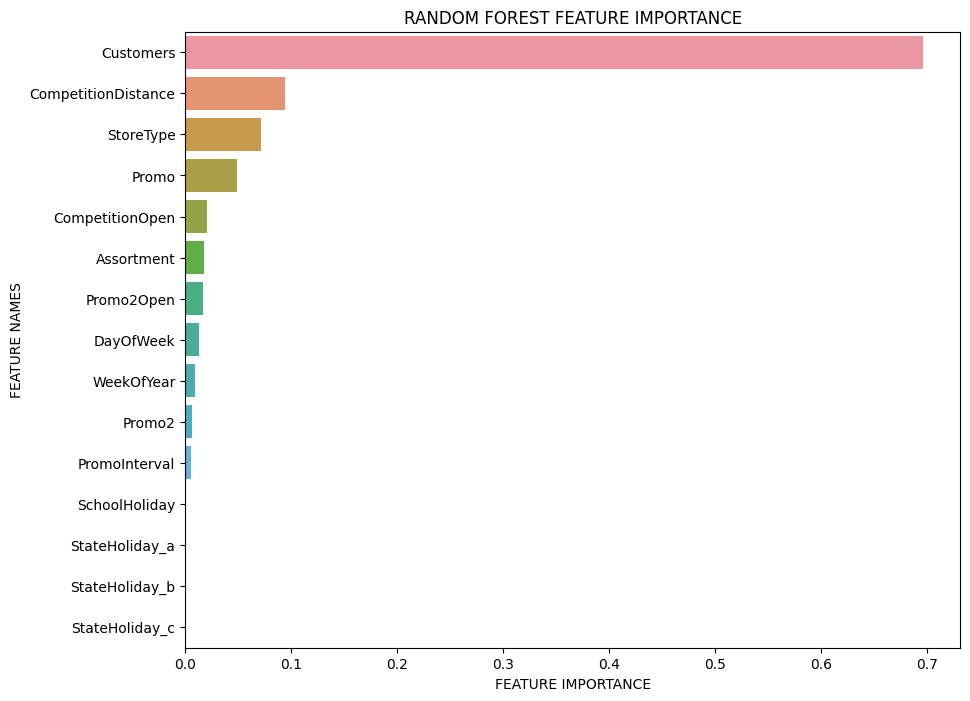

In [121]:
plot_feature_importance(model.feature_importances_,X.columns[:],'RANDOM FOREST')

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [122]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [123]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Here are some solutions to predict sales

Delete the observations when stores are not opened and also delete the column open because it will contain constant value.

Target column follows normal distribution if I remove zeros from the data.

Sum of the sale is least on day 7 it is because mostly on day 7 stores are not opened.

Average sale is more than 60% in case of promo.

Average sales for store type b is highest that is 37% and for type a,c,d is approximately 21%.

Average sales for assortment b is highest that is more than 42% and for a and c are 27.3% and 30.2% respectively.

We can deploy the model with Random Forest algorithm.

No overfitting is seen

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***